In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [3]:
def calculateRange(i, index, tot):
  if (index < i) :
    #not enouth in the upper part
    step = i - index
    return range(-i+step, i+1)

  elif((tot-1)-index < i):
    #not enouth in the lower part
    step = i - (tot - (index + 1))
    return range(-i, i+1-step)

  else:
    #hole filter
    return range(-i, i+1)

In [4]:
def erosion(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      minimum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel < minimum):
            #update the minimum
            minimum = pixel
      output_img[r][c] = minimum

  return output_img

In [5]:
def dilation(image, i):

  nrowfil = 2*i +1

  shape = image.shape
  nrows = image.shape[0]
  ncols = image.shape[1]

  output_img = image.copy()

  for r in range(nrows):
    for c in range(ncols):

      maximum = image[r][c]

      row_fil = calculateRange(i, r, nrows)
      col_fil = calculateRange(i, c, ncols)

      for row in row_fil:
        for col in col_fil:
          pixel = image[r+row][c+col]

          if(pixel > maximum):
            #update the maximum
            maximum = pixel
      output_img[r][c] = maximum

  return output_img

In [6]:
def opening(input_img, i):
  step1 = erosion(input_img, i)
  step2 = dilation(step1, i)
  return step2

In [7]:
img = cv2.imread("/content/drive/MyDrive/Image Analysis/Ex_segment/wheel.png", cv2.IMREAD_GRAYSCALE)

In [8]:
img.shape

(472, 480)

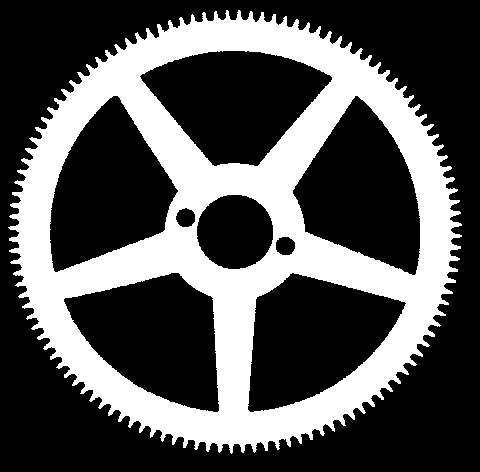

In [9]:
cv2_imshow(img)

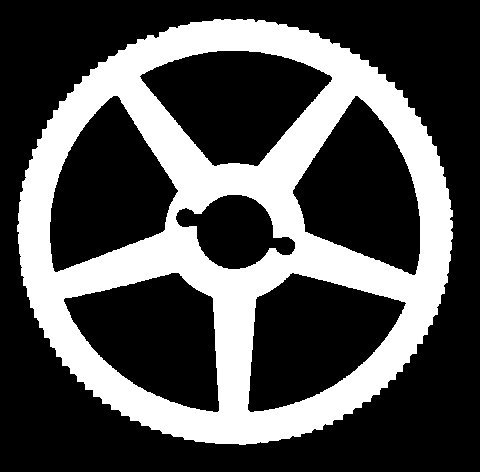

In [10]:
op = opening(img, 3)
cv2_imshow(op)

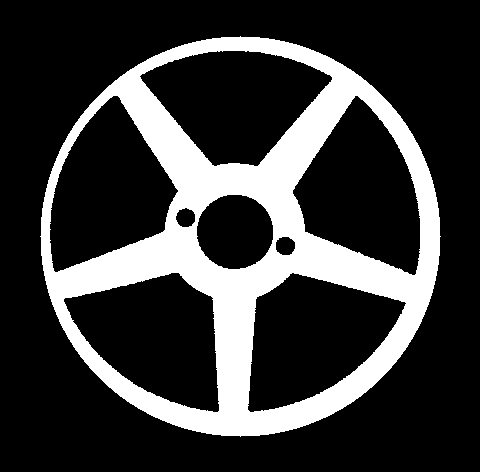

In [11]:
mask = np.zeros_like(img)
cv2.circle(mask, (240, 236), 175, 255, -1)
cv2.circle(mask, (240, 236), 200, 300, -1)
masked_img = cv2.bitwise_and(img, mask)
cv2_imshow(masked_img)

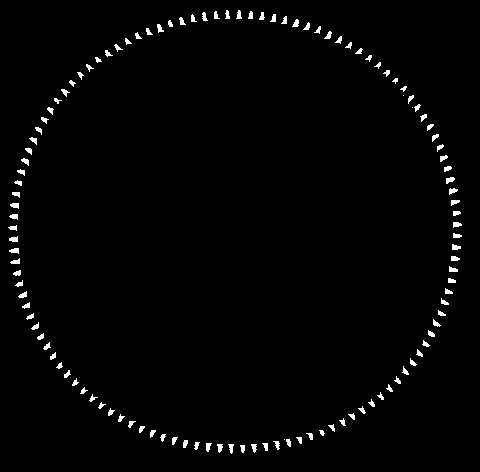

In [12]:
remove = (img - op) - masked_img 
cv2_imshow(remove)

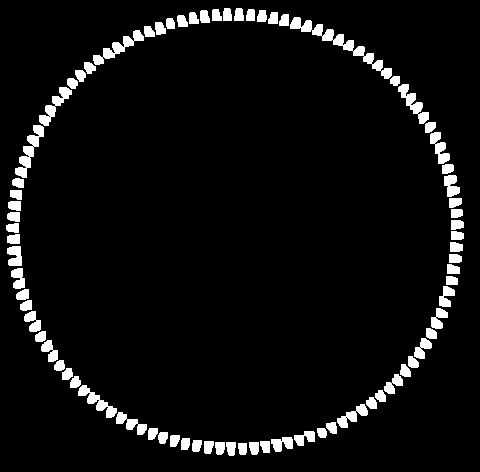

In [29]:
dil = dilation(remove, 2)
cv2_imshow(dil)

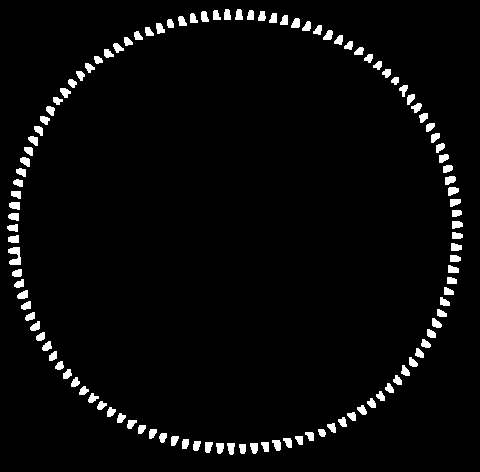

In [30]:
er = erosion(dil, 1)
cv2_imshow(er)

In [34]:
contours, _ = cv2.findContours(er, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [32]:
len(contours)

120